# Measure the signal area of CD21, CD23, CD35, D2-40

Following the outline of "analysis_notebook"

Already did CD21


In [1]:
import os
import re
import tifffile as tff
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank, threshold_local
import hdbscan
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from skimage.draw import polygon2mask
import tqdm
from skimage.filters.rank import entropy
from skimage.exposure import histogram
from PIL import Image, ImageStat
# import umap
# import leidenalg as la
# import igraph as ig
# from sklearn.manifold import MDS
# from sklearn.cluster import DBSCAN
# from sklearn.neighbors import radius_neighbors_graph

In [2]:
root_dir = "../../../outs/neighborhood_analysis"
dat_dir = [d for d in os.listdir(root_dir) if 'reg' in d and bool(re.match("R|MCD|HVCD",d))]

In [3]:
def concat_adata(pl):
    keep_p = []
    for p in pl:
        if not os.path.isfile(os.path.join(root_dir,p,'all_tiles_failed.token')):
            keep_p.append(p)
    dat = list(map(lambda x: ad.read_h5ad(os.path.join(root_dir, x, 'gated_dat.h5ad')), keep_p))
    # organize the markers consistently
    markers = list(map(lambda x: x.var_names.tolist(), dat))
    common_markers = set.intersection(*list(map(set,markers)))
    for a in dat:
        markeri = list(map(lambda x: int(np.where(x == a.var_names)[0]), common_markers))
        a = a[:,markeri]
    adata = ad.concat(dat, label="region", keys=keep_p, index_unique="_")
    return(adata)

In [4]:
def get_image_data(n, marker):
    img = tff.TiffFile("../../forQuPath/Data/"+n+"/input_codex.qptiff")
    if bool(re.match("R1|K1|K2",n)):
        channels = "channelNames"
    elif bool(re.match("HVCD1|MCD1|MCD3",n)):
        channels = "channelNames_cohort2"
    elif bool(re.match("HVCD2|MCD4|R2",n)):
        channels = "channelNames_cohort3"
    elif bool(re.match("K3",n)):
        channels = "channelNames_cohort4"
    m_list = pd.read_table("../../forQuPath/"+channels+".txt", header=None)
    try:
        marker_i = np.where(m_list[0]==marker)[0]
        dat = img.series[0].pages[int(marker_i)].asarray()
        return dat
    except TypeError:
        return None


In [5]:
adata = ad.read_h5ad('/mnt/isilon/cscb/Projects/codex/pillaiv/SCTC-VP-15/code/CD_analysis/aSMA_CD21_analysis/all_regions_dat.h5ad')

In [6]:
adata.var_names

Index(['DAPI', 'IRF4', 'CLEC9A', 'IRF8', 'TCF4', 'CD123', 'FOXP3', 'Ki67',
       'CD25', 'CD40', 'CD11c', 'PD-1', 'CD1c', 'BCL-2', 'CD134', 'CD68',
       'CD11b', 'ICOS', 'CD163', 'MPO', 'CD30', 'Podoplanin', 'HLA-DR', 'CD20',
       'CD8', 'CD138', 'CD23', 'Fascin', 'CD45', 'CD45RA', 'Mac2Gal3', 'CD4',
       'Granzyme B', 'CD21', 'CD3e', 'CD34', 'CD31', 'CD15'],
      dtype='object')

In [7]:
marker_names = ["CD21", "CD23", "CD35", "Podoplanin"]

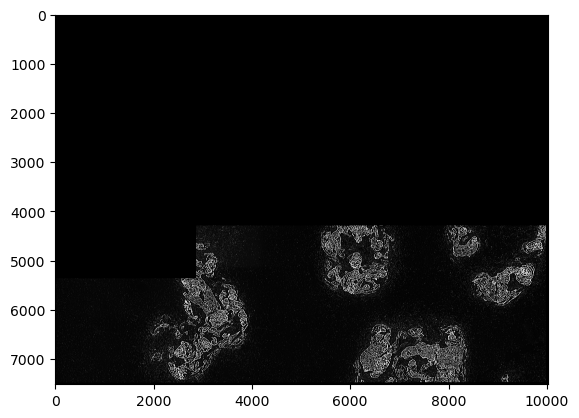

In [13]:
plt.imshow(img_dat, cmap='gray')

In [8]:
area_res = {i:[] for i in dat_dir if any([d in i for d in ['HVCD','MCD','R']])}
for i in tqdm.tqdm(area_res.keys()):
    print(i)
    reg_dat = adata.obs.loc[adata.obs['region']==i, :].copy()
    reg_area = ConvexHull(reg_dat[['Absolute.X', 'Absolute.Y']].to_numpy()).volume
    for m in ["CD21", "CD23", "CD35", "Podoplanin"]:
        img_dat = get_image_data(i, m)
        if img_dat is None:
            area_res[i].append(0)
        else:
            global_thresh = threshold_otsu(img_dat)
            m_total_area = np.sum(img_dat > global_thresh)/reg_area
            area_res[i].append(m_total_area)

  0%|          | 0/24 [00:00<?, ?it/s]/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()


MCD1_reg1


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
  4%|▍         | 1/24 [00:02<01:08,  2.98s/it]/tmp/ipykernel_618

MCD3_reg2


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
  8%|▊         | 2/24 [00:05<01:04,  2.95s/it]/tmp/ipykernel_618

MCD1_reg3


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 12%|█▎        | 3/24 [00:09<01:05,  3.12s/it]/tmp/ipykernel_618

HVCD2_reg1


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 17%|█▋        | 4/24 [00:11<00:57,  2.86s/it]/tmp/ipykernel_618

R1_reg3


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 21%|██        | 5/24 [00:13<00:47,  2.48s/it]/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()


MCD4_reg3


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 25%|██▌       | 6/24 [00:17<00:52,  2.92s/it]/tmp/ipykernel_618

R2_reg1


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 29%|██▉       | 7/24 [00:23<01:05,  3.87s/it]/tmp/ipykernel_618

HVCD1_reg3


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 33%|███▎      | 8/24 [00:26<00:59,  3.69s/it]/tmp/ipykernel_618

HVCD2_reg3


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 38%|███▊      | 9/24 [00:28<00:49,  3.28s/it]/tmp/ipykernel_618

MCD3_reg1


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 42%|████▏     | 10/24 [00:31<00:44,  3.18s/it]/tmp/ipykernel_61

HVCD1_reg1


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 46%|████▌     | 11/24 [00:35<00:42,  3.25s/it]/tmp/ipykernel_61

MCD4_reg1


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 50%|█████     | 12/24 [00:39<00:42,  3.53s/it]/tmp/ipykernel_61

MCD4_reg2


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 54%|█████▍    | 13/24 [00:43<00:39,  3.60s/it]/tmp/ipykernel_61

R1_reg2


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 58%|█████▊    | 14/24 [00:44<00:30,  3.05s/it]/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()


MCD4_reg4


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 62%|██████▎   | 15/24 [00:48<00:30,  3.35s/it]/tmp/ipykernel_61

HVCD2_reg2


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 67%|██████▋   | 16/24 [00:51<00:25,  3.13s/it]/tmp/ipykernel_61

MCD3_reg3


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 71%|███████   | 17/24 [00:54<00:22,  3.23s/it]/tmp/ipykernel_61

HVCD1_reg4


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 75%|███████▌  | 18/24 [01:00<00:23,  3.89s/it]/tmp/ipykernel_61

HVCD2_reg5


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 79%|███████▉  | 19/24 [01:03<00:18,  3.66s/it]/tmp/ipykernel_61

MCD1_reg4


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 83%|████████▎ | 20/24 [01:07<00:14,  3.65s/it]/tmp/ipykernel_61

HVCD1_reg2


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 88%|████████▊ | 21/24 [01:10<00:10,  3.59s/it]/tmp/ipykernel_61

MCD1_reg2


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 92%|█████████▏| 22/24 [01:14<00:07,  3.53s/it]/tmp/ipykernel_61

HVCD2_reg4


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
 96%|█████████▌| 23/24 [01:16<00:03,  3.26s/it]/tmp/ipykernel_61

R1_reg1


/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
/tmp/ipykernel_618521/89048385.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dat = img.series[0].pages[int(marker_i)].asarray()
100%|██████████| 24/24 [01:18<00:00,  3.28s/it]


In [9]:
out = pd.DataFrame(area_res).T
out.columns = marker_names
out

,CD21,CD23,CD35,Podoplanin
MCD1_reg1,0.019799,0.617851,0.476679,0.723645
MCD3_reg2,0.002393,0.156224,0.016583,0.274782
MCD1_reg3,0.025030,0.304477,0.034963,0.036326
HVCD2_reg1,0.048285,0.341018,0.013115,0.683838
R1_reg3,0.053149,0.007478,0.000000,0.013044
MCD4_reg3,0.009083,0.002007,0.011566,0.004297
R2_reg1,0.005689,0.331769,0.005499,0.816647
HVCD1_reg3,0.025578,0.002297,0.015750,0.290739
HVCD2_reg3,0.032285,0.334103,0.008920,0.239747
MCD3_reg1,0.007452,0.237308,0.038216,0.678247


In [10]:
out.to_csv("marker_areas.csv")

In [5]:
[ii for ii in dat_dir if 'HVCD' in ii]

['HVCD2_reg1',
 'HVCD1_reg3',
 'HVCD2_reg3',
 'HVCD1_reg1',
 'HVCD2_reg2',
 'HVCD1_reg4',
 'HVCD2_reg5',
 'HVCD1_reg2',
 'HVCD2_reg4']

In [6]:
np.prod([4,5])

20